# Dependencies installation & Compiling Data

In [1]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
os.path.join('train_colab', 'train.csv')

'train_colab\\train.csv'

In [4]:
df = pd.read_csv(os.path.join('train_colab', 'train.csv'))

In [5]:
df.iloc[4]['comment_text']

"You, sir, are my hero. Any chance you remember what page that's on?"

In [6]:
df[df.columns[2:]].iloc[4]

Mild toxicity       0
Severe toxicity     0
Obscene language    0
Insult toxicity     0
Name: 4, dtype: int64

# Data preprocessing

In [7]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.1.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.2.0
anaconda-project              0.10.2
analytics-python              1.4.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backoff                       1.10.0
back

In [8]:
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.preprocessing import text, sequence

In [9]:
X = df['comment_text']
y = df[df.columns[2:]].values
x = df['comment_text'].values

In [10]:
df.columns

Index(['f', 'comment_text', 'Mild toxicity', 'Severe toxicity',
       'Obscene language', 'Insult toxicity'],
      dtype='object')

In [11]:
df[df.columns[2:]]

,Mild toxicity,Severe toxicity,Obscene language,Insult toxicity
0,0,1,0,1
1,0,1,1,1
2,0,0,0,0
3,1,0,0,1
4,0,0,0,0
...,...,...,...,...
128601,0,1,1,1
128602,0,0,0,1
128603,0,1,1,1
128604,0,0,0,0


In [12]:
MAX_WORDS = 200000 # number of words in the vocab
#max_text_len=400
#trunc_type='post'
#padding_type='post'
#oov_tok = "<OOV>"

In [13]:
vectorizer = TextVectorization(max_tokens=MAX_WORDS,
                               output_sequence_length=1800,
                               output_mode='int')

In [15]:
type(X.values)

numpy.ndarray

In [16]:
vectorizer.adapt(X.values)

In [17]:
vectorized_text = vectorizer(X.values)

In [18]:
vectorizer('Hello, test')[:2]

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([372, 699], dtype=int64)>

In [19]:
vectorized_text

<tf.Tensor: shape=(128606, 1800), dtype=int64, numpy=
array([[  108,   151,     3, ...,     0,     0,     0],
       [ 1200,    74,   233, ...,     0,     0,     0],
       [  359,   393,    66, ...,     0,     0,     0],
       ...,
       [12367,  6592,     0, ...,     0,     0,     0],
       [    4,    12,   507, ...,     0,     0,     0],
       [    4,     5,   117, ...,     0,     0,     0]], dtype=int64)>

In [20]:
len(X)

128606

In [21]:
#len(X_train)

In [22]:
# Particularly helpful if you have a large dataset
# This is a data pipeline, MCShBP - map, cache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [23]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [24]:
batch_X.shape

(16, 1800)

In [25]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [26]:
train = dataset.take(int(len(dataset)*0.7))
val = dataset.skip(int(len(dataset)*0.7)).take(int(len(dataset)*0.2))
test = dataset.skip(int(len(dataset)*0.9)).take(int(len(dataset)*0.1))

In [27]:
train_generator = train.as_numpy_iterator()

In [28]:
train_generator.next()

(array([[  91,  139,    8, ...,    0,    0,    0],
        [  35,    8,   65, ...,    0,    0,    0],
        [  51,  396, 3888, ...,    0,    0,    0],
        ...,
        [   5, 1295,   12, ...,    0,    0,    0],
        [  61, 2918,   13, ...,    0,    0,    0],
        [1073,    8,    3, ...,    0,    0,    0]], dtype=int64),
 array([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [1, 0, 1, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [1, 0, 0, 1],
        [1, 0, 1, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=int64))

# Sequential Models

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [30]:
#Bidirectional??

In [31]:
#LSTM??

In [32]:
#Dense??

In [33]:
model = Sequential()

# Create the embedding layer
model.add(Embedding(MAX_WORDS+1, 32))

# Dropout layer
model.add(Dropout(0.3))

# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))

# Feature extractor Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Final layer 
model.add(Dense(4, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                        

In [34]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Training the model and displaying chart containing Loss and Validation Loss
**_val_loss_** is the value of cost function for your cross-validation data. <br>
**_loss_** is the value of cost function for your training data.

On validation data, neurons using drop out do not drop random neurons. The reason is that during training we use drop out in order to add some noise for avoiding over-fitting. During calculating cross-validation, we are in the recall phase and not in the training phase. We use all the capabilities of the network.

In [35]:
#X_train,batch_X,y_train,batch_y=train_test_split(X_train,y,test_size=0.15,random_state=1)

In [36]:
# Train the dataset
# Epoch = how many passes for dataset
batch_size=64
archive=model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
5626/5626 [==============================] - 2788s 495ms/step - loss: 0.0935 - accuracy: 0.9775 - val_loss: 0.0668 - val_accuracy: 0.9928
Epoch 2/5
5626/5626 [==============================] - 2757s 490ms/step - loss: 0.0672 - accuracy: 0.9893 - val_loss: 0.0580 - val_accuracy: 0.9935
Epoch 3/5
5626/5626 [==============================] - 2767s 492ms/step - loss: 0.0589 - accuracy: 0.9887 - val_loss: 0.0514 - val_accuracy: 0.9847
Epoch 4/5
5626/5626 [==============================] - 2779s 494ms/step - loss: 0.0534 - accuracy: 0.9850 - val_loss: 0.0464 - val_accuracy: 0.9923
Epoch 5/5
5626/5626 [==============================] - 2768s 492ms/step - loss: 0.0486 - accuracy: 0.9878 - val_loss: 0.0414 - val_accuracy: 0.9915


In [37]:
from matplotlib import pyplot as plt

In [38]:
#plt.figure(figsize=(8,5))
#pd.DataFrame(archive.history).plot()
#plt.show()

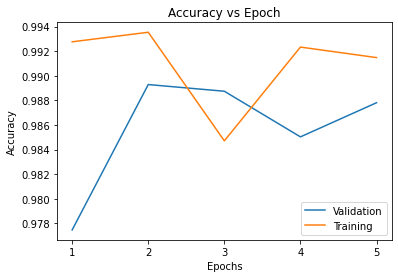

In [39]:
epochs = range(len(archive.history['accuracy']))
plt.plot(epochs,archive.history['accuracy'],label='Validation')
plt.plot(epochs,archive.history['val_accuracy'],label='Training')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.xticks(range(len(archive.history['accuracy'])),labels=[1,2,3,4,5])
plt.title('Accuracy vs Epoch')
plt.legend()
plt.show()

# Save model after training, load model function(H5)

In [40]:
# Save data after training 27/July/2022
model.save('epoch1_DOP3_dense-256-128.h5')
# Load model data
model = tf.keras.models.load_model('epoch1_DOP3_dense-256-128.h5')

# Prediction data

In [41]:
input_text = vectorizer('china teammate noob')

In [42]:
df.columns[2:]

Index(['Mild toxicity', 'Severe toxicity', 'Obscene language',
       'Insult toxicity'],
      dtype='object')

In [43]:
model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 727ms/step


array([[0.73163116, 0.10469339, 0.28263342, 0.42123014]], dtype=float32)

In [44]:
batch = test.as_numpy_iterator().next()

In [45]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [46]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 96ms/step


array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [47]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 56ms/step


In [48]:
res

array([[0.73163116, 0.10469339, 0.28263342, 0.42123014]], dtype=float32)

In [49]:
res.shape

(1, 4)

# Model Evaluation

In [50]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [51]:
prc = Precision()
rcl = Recall()
acc = CategoricalAccuracy()

In [52]:
for batch in test.as_numpy_iterator(): 
    
    # Unpack the batch 
    X_true, y_true = batch
    
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    prc.update_state(y_true, yhat)
    rcl.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 82ms/step


In [53]:
print(f'Precision: {prc.result().numpy()},Recall:{rcl.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.889480710029602,Recall:0.8458372950553894, Accuracy:0.5068492889404297


# 5. Test and Gradio

In [54]:
!pip install gradio jinja2

In [55]:
import tensorflow as tf
import gradio as gr

In [56]:
input_str = vectorizer('fucking noob china man')

In [57]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 0s 54ms/step


In [58]:
res

array([[0.99300146, 0.40353873, 0.99442357, 0.77256745]], dtype=float32)

In [59]:
def score_comment(Chat):
    vectorized_comment = vectorizer([Chat])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [60]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Type to evaluate'),
                        outputs='text')

C:\ProgramData\Anaconda3\lib\site-packages\gradio\inputs.py:26: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\ProgramData\Anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\ProgramData\Anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [61]:
interface.launch(share=False)

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x24b8d6a2af0>, 'http://127.0.0.1:7860/', None)